In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# ===================================================
# 1. Generación manual del conjunto de datos (dataset)
# ===================================================
# Creamos un conjunto de datos artificial en 2D con dos clases linealmente separables:
# Cada fila de la matriz X representa un vector de características de dimensión 2.

X = np.array([
    [2,3],
    [1,5],
    [2,4],
    [3,2],
    [6,1],
    [7,2],
    [5,1]
])

# Etiquetas asociadas a cada punto.
# Las tres primeras muestras pertenecen a la clase -1 y el resto a la clase +1.
# Estas etiquetas representan la variable objetivo (target).
Y = np.array([-1,-1,-1,+1,+1,+1,+1])

In [4]:
# ===================================================
# 2. Inicialización de parámetros del modelo Perceptrón
# ===================================================
# Inicializamos el vector de pesos w como un vector nulo (todos ceros),
# con una dimensión igual al número de características (2 en este caso).
W = np.zeros(X.shape[1])  # Inicialización: w = [0.0, 0.0]

# Inicializamos el sesgo o bias como 0.
b = 0.0

# Definimos la tasa de aprendizaje (learning rate),
# que controla el tamaño de los pasos que da el modelo durante la actualización.
learning_rate = 0.1

# Definimos el número de épocas (iterations over the entire dataset).
# Cada época representa una pasada completa sobre todos los datos.
n_epochs = 10

In [5]:
# ===================================================
# 3. Entrenamiento del modelo mediante la Regla del Perceptrón
# ===================================================
# Por cada época, iteramos sobre cada muestra del dataset.
# Para cada muestra (xᵢ, yᵢ), realizamos una predicción y, si es incorrecta,
# aplicamos la regla de actualización del Perceptrón.

for epoch in range(n_epochs):
    for i in range(len(X)):
        x_i = X[i]
        y_i = Y[i]
        # Predicción: sign(W · X + b)
        prediction = np.sign(np.dot(W, x_i) + b)
        
        # Si hay un error de clasificación (prediction ≠ y_i),
        # se actualizan los pesos y el sesgo según la regla del perceptrón:
        #   w ← w + α · yᵢ · xᵢ
        #   b ← b + α · yᵢ
        if prediction != y_i:
            W += learning_rate * y_i * x_i
            b += learning_rate * y_i

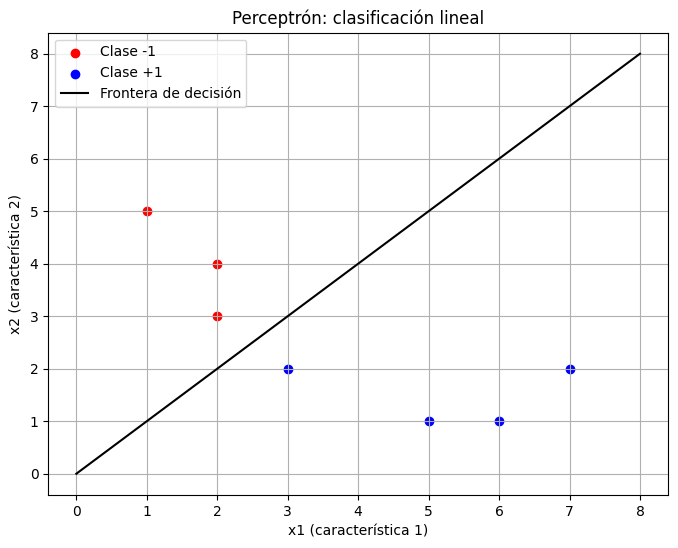

In [6]:
# ===================================================
# 4. Visualización de las muestras y la frontera de decisión
# ===================================================
# Definimos una función para visualizar los datos y la recta de separación
# aprendida por el modelo. Esta recta representa la frontera de decisión
# en el espacio de características.

def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8,6))
    
    # Representación gráfica de las dos clases con colores distintos.
    # Se usa una etiqueta de leyenda solo una vez por clase.
    # Puntos de clase -1 y +1
    for i in range(len(X)):
        if y[i] == -1:
            plt.scatter(X[i][0], X[i][1], color='red', label='Clase -1' if i == 0 else "")
        else:
            plt.scatter(X[i][0], X[i][1], color='blue', label='Clase +1' if i == 3 else "")
    
    # Cálculo de los valores de y para la frontera de decisión:
    # Partimos de la ecuación: w₁·x₁ + w₂·x₂ + b = 0
    # Despejamos x₂:  x₂ = -(w₁·x₁ + b) / w₂
    x_vals = np.linspace(0,8,100)
    y_vals = -(W[0] * x_vals + b) / W[1]
    
    # Dibujamos la recta con la frontera de decisión
    plt.plot(x_vals, y_vals, label = 'Frontera de decisión', color='black')
    
    # Etiquetas de los ejes y título del gráfico
    plt.xlabel('x1 (característica 1)')
    plt.ylabel('x2 (característica 2)')
    plt.title('Perceptrón: clasificación lineal')
    
    # Agregamos leyenda y grilla
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutamos la visualización
plot_decision_boundary(X, Y, W, b)